In [177]:
import pandas as pd
import numpy as np

# read the data file from GitHub and convert to a NumPy ndarray object
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv" 
hflights = pd.read_csv(filename)
hflights

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,NaN,0
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,-1.0,-1.0,IAH,DFW,224,12.0,15.0,0,NaN,0
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,-16.0,-5.0,IAH,DFW,224,7.0,12.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


Ｑuestion2:
    
Which flight has the longest average delay-time,and how long is it?

we think passengers would take care of this information more, as long as they know which flight has the longest average delay-time, 
they may avoid choosing it and improve their travel experience.

Narrative for transformations:
    
Assumption: the delay time only includes the time that arrive is late or departure is late. So at first,we change all
the ArrDelay and DepDelay values which are more than 0 to 0.And also remove some columns that we do not use in this question.
After that, to get the average delay-time, we need to we create a new column called totaltime_delay to store the sum of ArrDelay 
and DepDelay.And then we should use groupby to category the each flight and get their mean of delay time.Finally use min to get the maximum 
average delay time. PS:all the delay time values will be negative, and the maximum average delay time is actually the min.

In [198]:
#remove some columns that we do not use in this question.
#change the values that are more than 0 in the ArrDelay or DepDelay to 0, and only keep the negative numbers in these two rows.
#create a new column called totaltime_delay to store the sum of ArrDelay and DepDelay

dhflights = hflights.drop(columns = ['DayOfWeek','DepTime','ArrTime','UniqueCarrier','FlightNum','ActualElapsedTime','AirTime','Distance','TaxiIn','TaxiOut','CancellationCode','Diverted','Origin','Dest','Cancelled'])

dhflights[dhflights['ArrDelay'] > 0] = 0

dhflights[dhflights['DepDelay'] > 0] = 0

dhflights['Totaltime_delay'] = dhflights['ArrDelay'] + dhflights['DepDelay']

dhflights

,Year,Month,DayofMonth,TailNum,ArrDelay,DepDelay,Totaltime_delay
0,2011,1,1,N576AA,-10.0,0.0,-10.0
1,0,0,0,0,0.0,0.0,0.0
2,2011,1,3,N541AA,-8.0,-8.0,-16.0
3,0,0,0,0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0
5,2011,1,6,N262AA,-7.0,-1.0,-8.0
6,2011,1,7,N493AA,-1.0,-1.0,-2.0
7,2011,1,8,N477AA,-16.0,-5.0,-21.0
8,0,0,0,0,0.0,0.0,0.0
9,0,0,0,0,0.0,0.0,0.0


In [199]:
#after get the total delay time, we should group by each flight and get their average delay time by different TailNum.
#store the mean result to a new datafram called mean_dhflights

mean_dhflights =dhflights.groupby('TailNum').mean()
mean_dhflights

,Year,Month,DayofMonth,ArrDelay,DepDelay,Totaltime_delay
TailNum,,,,,,
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
N10156,2011.0,1.000000,10.700000,-7.400000,-3.100000,-10.500000
N11106,2011.0,1.000000,21.571429,-5.142857,-5.000000,-10.142857
N11107,2011.0,1.000000,24.750000,-7.125000,-2.750000,-9.875000
N11109,2011.0,1.000000,18.363636,-6.818182,-3.727273,-10.545455
N11113,2011.0,1.000000,8.615385,-7.692308,-3.461538,-11.153846
N11119,2011.0,1.000000,16.615385,-9.461538,-4.000000,-13.461538
N11121,2011.0,1.000000,15.250000,-9.416667,-3.166667,-12.583333
N11127,2011.0,1.000000,18.928571,-7.571429,-3.642857,-11.214286


#a written narrative that explains my data analysis 

To show the exploratory data analysis, we choose to generate a plot to show the average delay time for each flight, and use describe to get more data analysis.

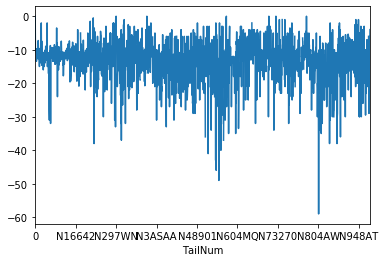

In [200]:
# create a plot of mean_dhflights' average 'Totaltime_delay' column's values 

mean_dhflights.Totaltime_delay.plot()

In [201]:
# get descriptive statistics for a DataFrame column

mean_dhflights['Totaltime_delay'].describe()

count    1618.000000
mean      -13.554373
std         6.594150
min       -59.000000
25%       -16.937500
50%       -12.500000
75%        -9.564394
max         0.000000
Name: Totaltime_delay, dtype: float64

From the plot,  we can see the average delay time for all flights is 13.554373.there are 1618 flights that had delayed before. The highest delay time is 59 munites which is our max average delay time.And the corresponging X is our TailNum. we can get the actual max average delay time value as follows:

In [202]:
#retrieve a datafram called mean_TailNum_max to show the max average Totaltime_delay

mean_TailNum_max = mean_dhflights[mean_dhflights['Totaltime_delay'] == min(mean_dhflights['Totaltime_delay'])]
mean_TailNum_max

,Year,Month,DayofMonth,ArrDelay,DepDelay,Totaltime_delay
TailNum,,,,,,
N804SK,2011.0,1.0,30.0,-49.0,-10.0,-59.0


In [203]:
#print the result of the max average totaltime_delay
#print the flight name of the max average Totaltime_delay

print('the max average totaltime_delay:',min(mean_dhflights['Totaltime_delay']))

print('the flight has the max average delay-time is: ',mean_TailNum_max.index)

the max average totaltime_delay: -59.0
the flight has the max average delay-time is:  Index(['N804SK'], dtype='object', name='TailNum')
